In [ ]:
#Import libraries

% matplotlib inline

from matplotlib import pylab as pylab

from skimage.io import imread

from skimage.color import rgb2gray

from skimage.feature import corner_harris, corner_subpix, corner_peaks 
from skimage.transform import warp, SimilarityTransform, AffineTransform, resize

import cv2

import numpy as np

from skimage import data

from skimage.util import img_as_float

from skimage.exposure import rescale_intensity

from skimage.measure import ransac

from skimage.io import imread

from skimage.color import rgb2gray

import matplotlib.pylab as pylab

from skimage.morphology import binary_erosion, rectangle

<Figure size 432x288 with 0 Axes>

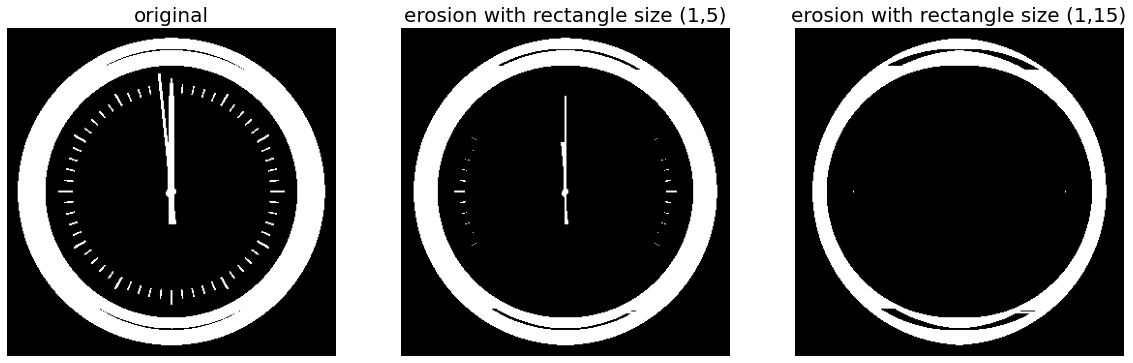

In [ ]:
#1.Image Erosion
def plot_image(image, title=""):
  pylab.title(title, size=20), pylab.imshow(image)
  pylab.axis('off') # comment this line if you want axis ticks



im=rgb2gray(imread('/content/drive/MyDrive/images/clock2.jpg'))

im[im <= 0.5]= 0 # create binary image with fixed threshold 0.5 imtim 0.5] = 1 pylab.subplot(1,3,3), plot image (iml, erosion with rectangle size (1,15))
im[im > 0.5]= 1
pylab.gray()
pylab.figure(figsize=(20,10)) 
pylab.subplot(1,3,1), plot_image (im, "original")
im1 = binary_erosion (im, rectangle(1,5)) 
pylab.subplot (1,3,2), plot_image (im1, 'erosion with rectangle size (1,5)')
im2 = binary_erosion(im, rectangle(1,15))
pylab.subplot(1,3,3), plot_image(im2, 'erosion with rectangle size (1,15)')

pylab.show()

<Figure size 432x288 with 0 Axes>

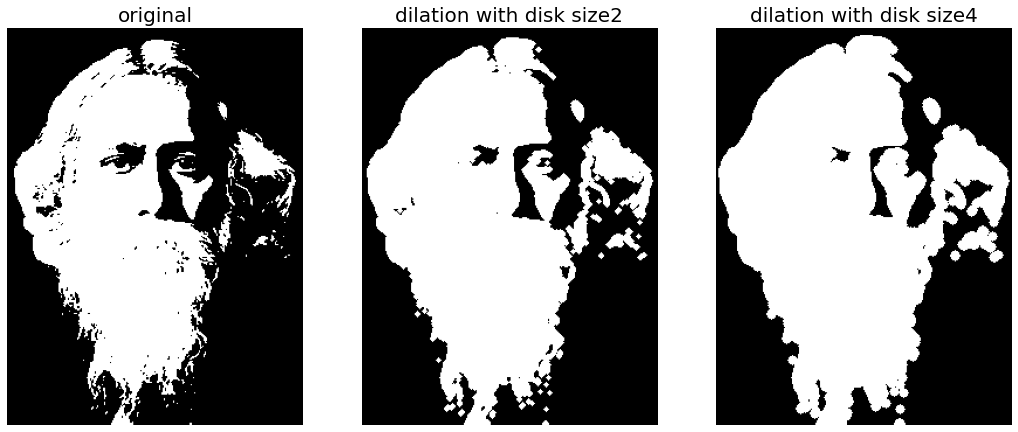

In [ ]:
#2.Image Dilation
from skimage.morphology import binary_dilation, disk 

from skimage import img_as_float

im = img_as_float(imread('/content/drive/MyDrive/images/tagore.png'))

im = 1- im[...,3] 

im[im < 0.5] = 0

im [im > 0.5] = 1 

pylab.gray()

pylab.figure(figsize=(18,9))

pylab.subplot(131)

pylab.imshow(im)

pylab.title('original', size=20)

pylab.axis('off')

for d in range(1,3): 
  pylab.subplot(1,3,d+1)

  im1 = binary_dilation(im, disk(2*d))

  pylab.imshow(im1) 
  pylab.title('dilation with disk size' + str(2*d), size=20)
  
  pylab.axis('off')
pylab.show()

<Figure size 432x288 with 0 Axes>

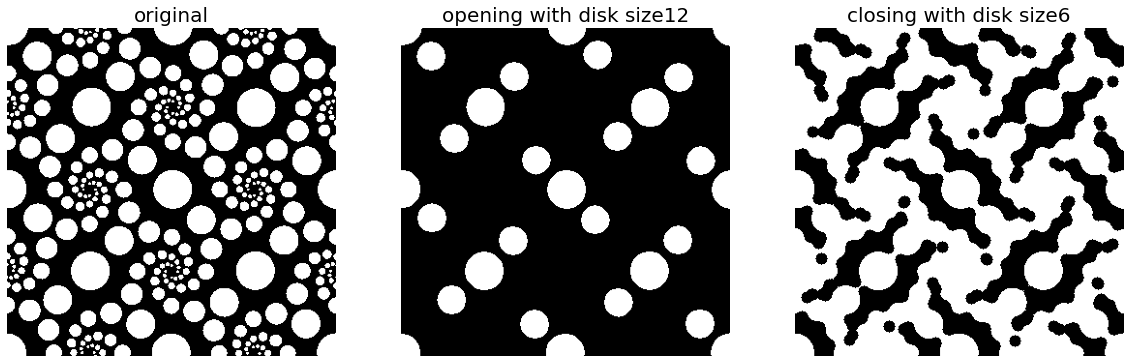

In [ ]:
#3.Opening and Closing
from skimage.morphology import binary_opening, binary_closing, binary_erosion, binary_dilation, disk 
im = rgb2gray(imread('/content/drive/MyDrive/images/circles.jpg')) 
im[im <= 0.5] = 0
im[im> 0.5]= 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_opening (im, disk(12))
pylab.subplot(1,3,2), plot_image (im1, 'opening with disk size' + str(12))
im2 = binary_closing (im, disk(6))
pylab.subplot(1,3,3), plot_image (im2, 'closing with disk size' + str(6)) 
pylab.show()



<Figure size 432x288 with 0 Axes>

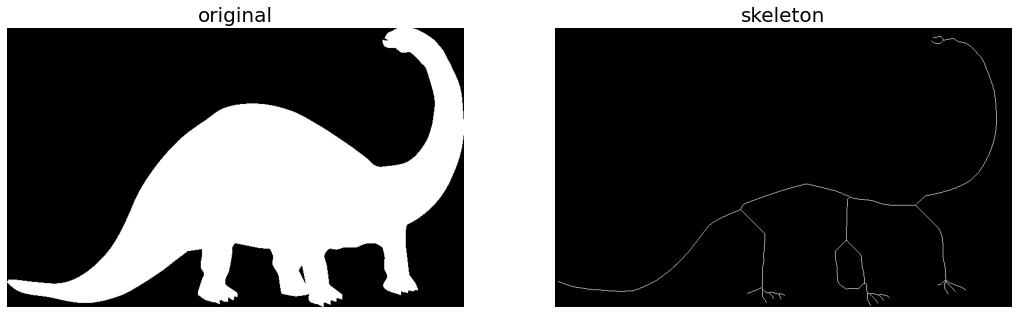

In [ ]:
#4.Skeletonizing
def plot_images_horizontally(original, filtered, filter_name, sz=(18,71)):
  pylab.gray()
  pylab.figure(figsize = sz)
  pylab.subplot(1,2,1), plot_image (original, 'original')
  pylab.subplot(1,2,2), plot_image (filtered, filter_name)
  pylab.show()


from skimage.morphology import skeletonize

im = img_as_float(imread('/content/drive/MyDrive/images/dynasaur.png')[...,3])

threshold = 0.5

im[im <= threshold]= 0

im[im>threshold]= 1

skeleton = skeletonize(im)

plot_images_horizontally(im, skeleton, 'skeleton', sz=(18,9))

<Figure size 432x288 with 0 Axes>

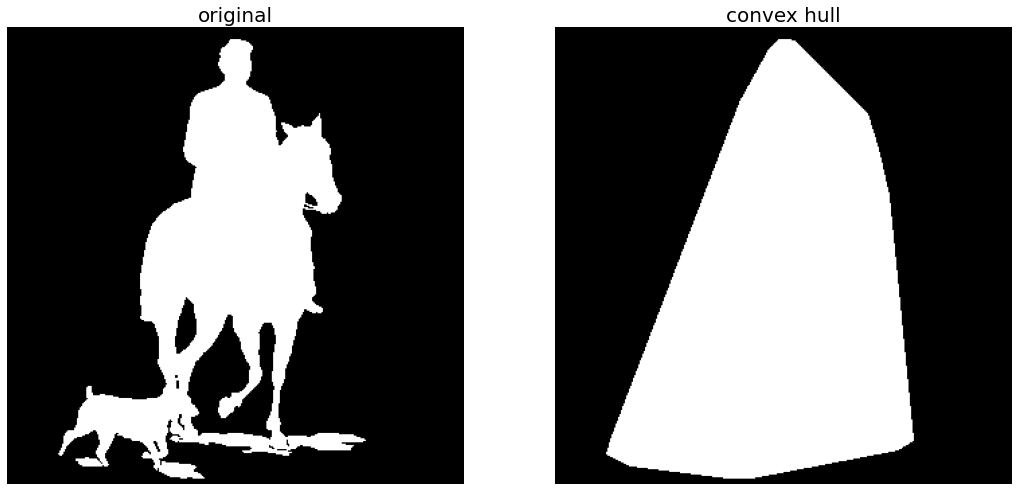

In [ ]:
#5.Computing the convex hull
from skimage.morphology import convex_hull_image
im = rgb2gray(imread('/content/drive/MyDrive/images/horse-dog.jpg')) 
threshold= 0.5
im[im <threshold]=0 # convert to binary image 
im[im>= threshold] = 1 
chull = convex_hull_image(im) 
plot_images_horizontally(im, chull, 'convex hull', sz=(18,9))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


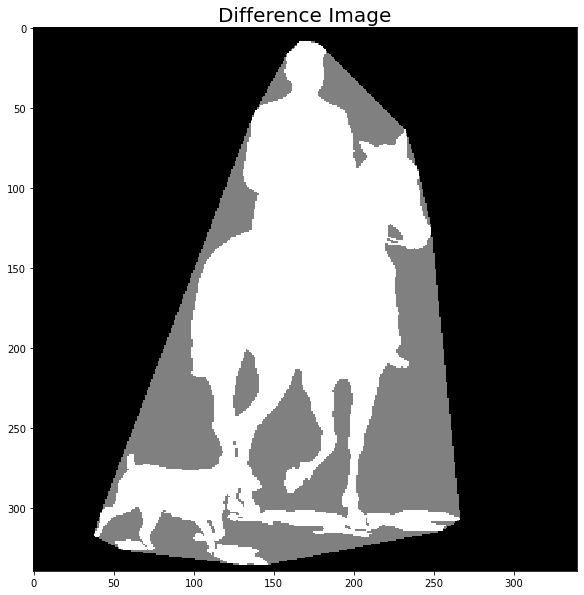

In [ ]:
#6.Interpolation
im = im.astype(np.bool)
chull_diff=img_as_float(chull.copy())
chull_diff[im] = 2
pylab.figure(figsize=(28,10)) 
pylab.imshow(chull_diff, cmap=pylab.cm.gray, interpolation= 'nearest') 
pylab.title('Difference Image', size=20)
pylab.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


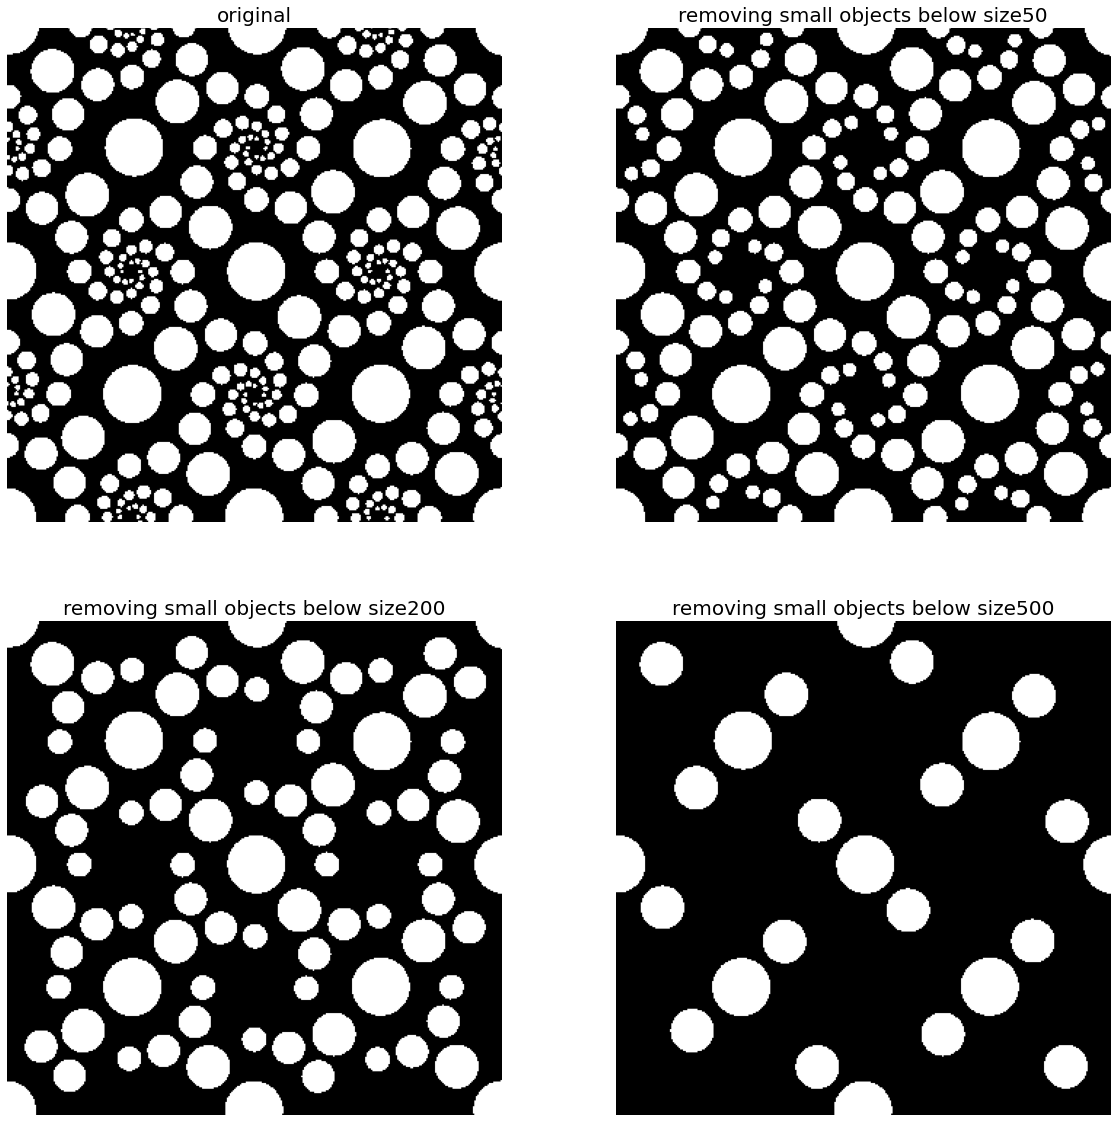

In [ ]:
#7.Removing small objects
from skimage.morphology import remove_small_objects
im = rgb2gray(imread('/content/drive/MyDrive/images/circles.jpg'))
im[im > 0.51] = 1 # create binary image by thresholding with fixed threshold
0.5
im[im <= 0.51] = 0
im = im.astype (np. bool)
pylab.figure(figsize=(20,20))
pylab.subplot (2,2,1), plot_image(im, 'original')
i = 2
for osz in [50, 200, 500]:
  im1 = remove_small_objects(im, osz, connectivity=1)
  pylab.subplot(2,2,i),plot_image(im1,'removing small objects below size'+str(osz))
  i += 1

pylab. show ()

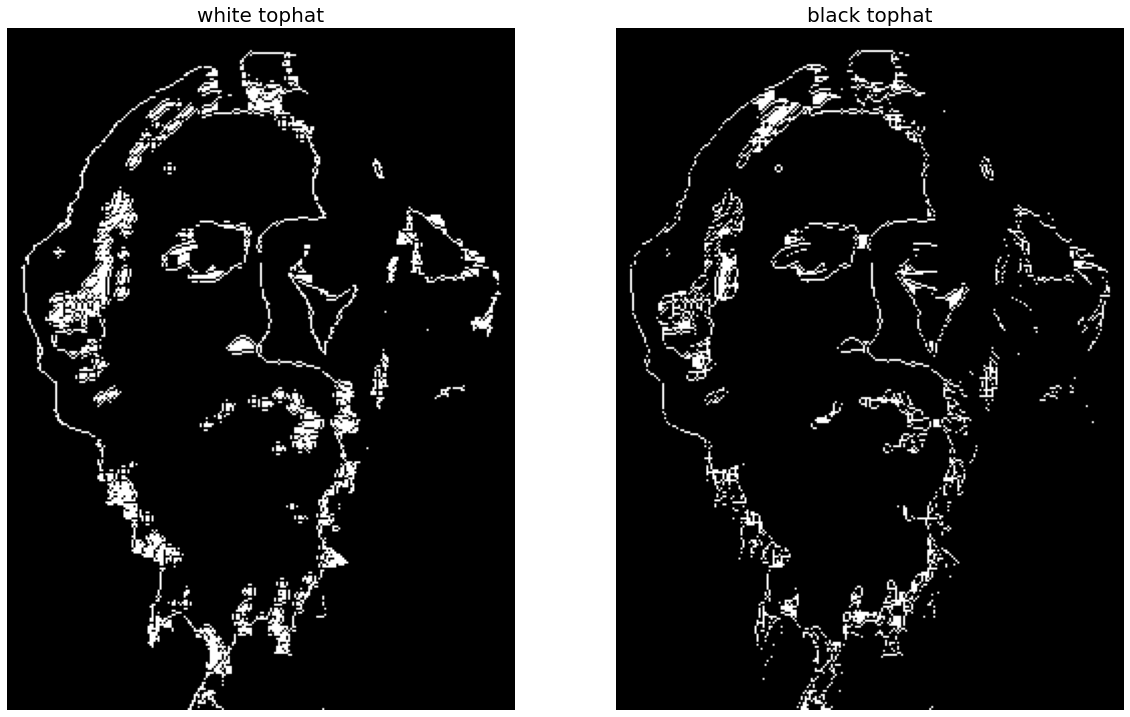

In [ ]:
#8.White and Black tophat
from skimage.morphology import white_tophat, black_tophat, square 
im =imread('/content/drive/MyDrive/images/tagore.png')[...,3] 
im[im <= 0.5] =0
im[im > 0.5] = 1
im1 = white_tophat(im, square (5))
im2 = black_tophat(im, square(5)) 
pylab.figure(figsize=(20, 15)) 
pylab.subplot(1,2,1), plot_image(im1, 'white tophat')
pylab.subplot(1,2,2), plot_image (im2, 'black tophat') 
pylab.show()

<Figure size 432x288 with 0 Axes>

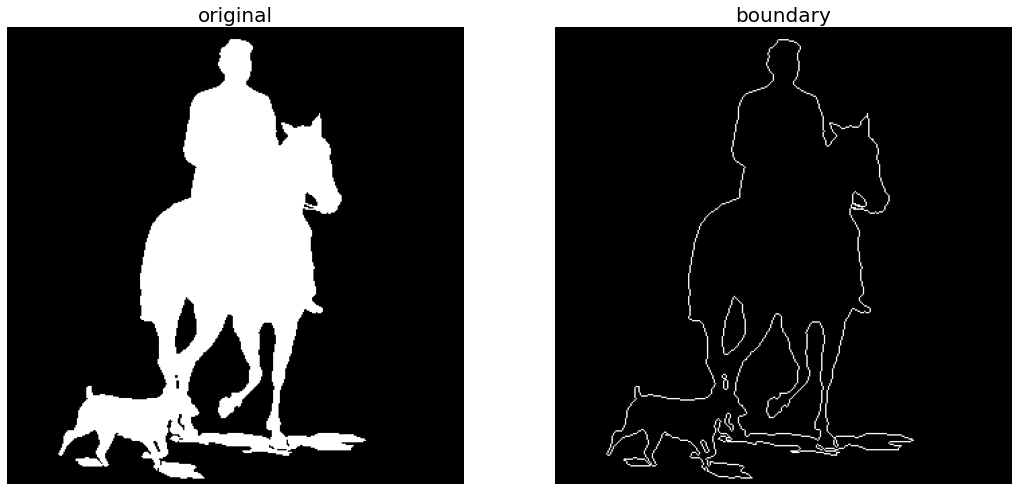

In [ ]:
#Extracting the boundry
from skimage.morphology import binary_erosion 
im = rgb2gray(imread('/content/drive/MyDrive/images/horse-dog.jpg'))
threshold = 0.5
im[im < threshold] =0 
im[im>=threshold] =1 
boundary = im - binary_erosion(im) 
plot_images_horizontally(im, boundary, 'boundary',sz=(18,9))

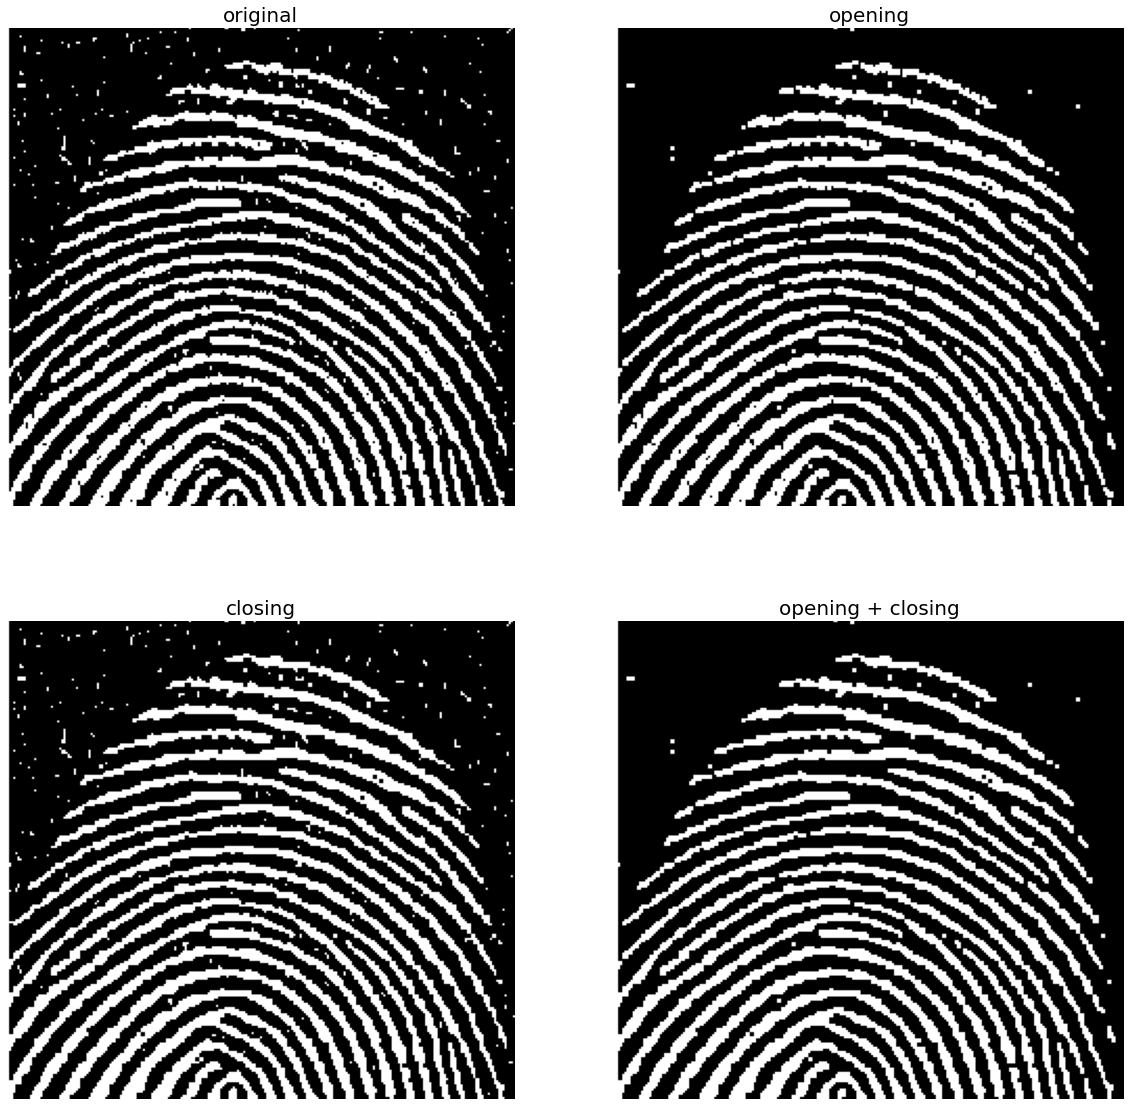

In [ ]:
#Fingerprint
im = rgb2gray(imread('/content/drive/MyDrive/images/fingerprint.jpg'))
im[im<= 0.5] = 0 # binarize
im[im > 0.5]= 1
im_o = binary_opening(im,square(2))
im_c = binary_closing(im,square(2))
im_oc = binary_closing(binary_opening(im, square(2)), square (2))
pylab.figure(figsize=(20,20))
pylab.subplot (221), plot_image(im,'original')
pylab.subplot (222), plot_image(im_o,'opening')
pylab.subplot (223), plot_image(im_c,'closing')
pylab.subplot (224) , plot_image (im_oc,'opening + closing')
pylab.show()

In [ ]:
#Noise removal with the median filter
from skimage.filters. rank import enhance_contrast 
from skimage import exposure
def plot_gray_image(ax, image, title): 
  ax.imshow(image, cmap=pylab.cm.gray),
  ax.set_title(title), ax.axis('off') 
  ax.set_adjustable('box-forced')

image = rgb2gray(imread('../images/squirrel.jpg"))
sigma = 0.05
noisy_image=np.clip(image+ sigma* np.random.standard_normal(image.shape), 0, 1) 
enhanced_image = enhance_contrast(noisy_image, disk(5))
equalized_image = exposure.equalize_adapthist(noisy_image)

fig, axes = pylab.subplots(1, 3, figsize=[18, 7], sharex= 'row', sharey='row!)
axes1, axes2, axes3 = axes.ravel() 
plot_gray_image(axes1, noisy image, 'Original')

plot_gray_image(axes2, enhanced_image, 'Local morphological contrast enhancement')

plot_gray_image(axes3, equalized_image, 'Adaptive Histogram equalization')



from skimage.filters.rank import median
from skimage.morphology import disk
noisy_image = (rgb2gray(imread('/content/drive/MyDrive/images/lena.jpg'))*255).astype(np.uint8)
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.9] = 255
noisy_image[noise < 0.1] = 0
fig, axes = pylab.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axesl, axes2, axes3, axes4 = axes.ravel()
plot_gray_image(axes1, noisy_image,'Noisy image')
plot_gray_image(axes2, median(noisy_image, disk(1)),'Median $r=1$')
plot_gray_image(axes3, median(noisy_image, disk(5)),'Median $r=5$')
plot_gray_image(axes4, median(noisy_image, disk(20)),'Median $r=20$')

SyntaxError: ignored

# Feature Extraction

(1280, 960)
[[0.59239569 0.59239569 0.59239569 ... 0.99354863 0.9974702  0.9974702 ]
 [0.58847412 0.58847412 0.58847412 ... 0.99663686 0.99663686 0.99663686]
 [0.58847412 0.58847412 0.58847412 ... 0.98907647 0.98907647 0.98907647]
 ...
 [0.04900824 0.04508667 0.05685137 ... 0.40315451 0.40707608 0.40707608]
 [0.06077294 0.0529298  0.0529298  ... 0.40707608 0.41099765 0.41099765]
 [0.15096902 0.12743961 0.09998863 ... 0.41491922 0.41099765 0.41099765]]


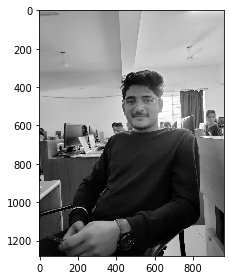

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
image = imread('/content/drive/MyDrive/HSG/Rochan.jpeg',as_gray=True)
imshow(image)
print(image.shape)
print(image)

NameError: ignored

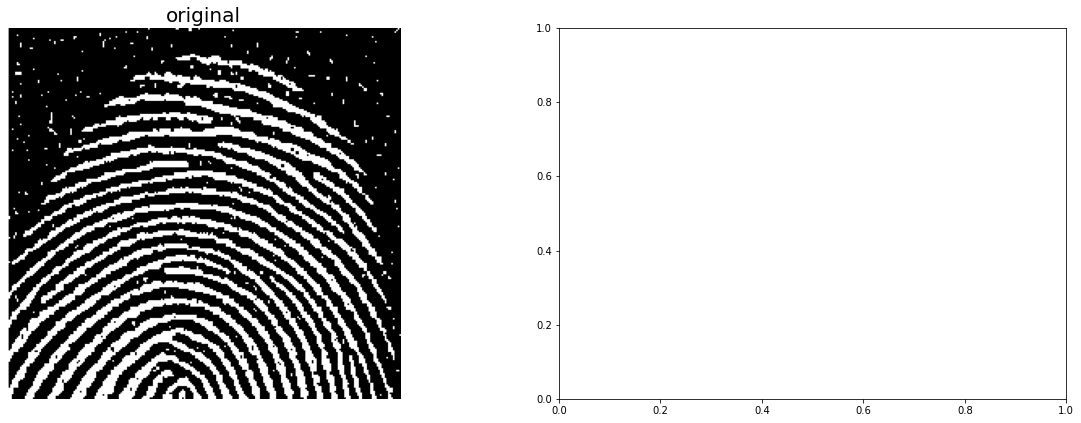

In [ ]:
#sift
sift = cv2.SIFT_create()
#feature matching
bf= cv2.BFMatcher (cv2.NORM_L2, crossCheck=True)
pylab.figure(figsize=(20,15))
pylab.subplot(221), pylab.imshow(im), pylab.title('original', size=20), pylab.axis('off')
i=2

for n in [3,5,7]:
  pylab.subplot(2, 2, i)
  im1 = binary_fill_holes(im, structure=np.ones((n,n))) 
  pylab.imshow(im1), pylab.title('binary fill holes with structure square side'+str(n),size=20)
  pylab.axis('off')

img1 = cv2.imread('content/1657276245239.1peg')
img2 = cv2.imread('content/Screenshot from 2022-07-11 23-15-13.png')
img1 = cv2. cvtColor(imgl, cv2.COLOR_BGR2GRAY)
img2 = cv2. cvtColor(img2, cv2.COLOR_BGR2GRAY)
keypoints1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)
matches = bf.match(descriptors_1, descriptors_2)
matches = sorted (matches, key = lambda x:x.distance)
img3 = cv2. drawMatches (img1, keypoints_1, img2, keypoints_2, matches[:600], img2, flags=2)
cv2_imshow(img3)
cv2.waitKey(0)